## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import scipy.signal

## Read the audio file

In [2]:
def read_audio_file(file_path):
    # Read the audio file using scipy's wavfile module
    sample_rate, audio_data = wavfile.read(file_path)
    return (audio_data[:,0]+audio_data[:,1])/2, sample_rate

## Plot the waveform of audio

In [3]:
def plot_waveform(audio_data, sample_rate, audio_file_name):
    plt.figure(figsize=(10, 4))
    plt.title("Waveform")
    plt.plot(np.arange(len(audio_data)) / sample_rate, audio_data)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    save_plot(plt, audio_file_name, 'waveform')  # Save the waveform plot
    plt.show()

## Compute Spectrogram

In [4]:
def compute_spectrogram(audio_data, sample_rate, window_size_sec, hop_size_sec):
    window_size = int(window_size_sec * sample_rate)
    hop_size = int(hop_size_sec * sample_rate)
    
    n_frames = int(np.floor((len(audio_data) - window_size) / hop_size)) + 1
    spectrogram = np.zeros((window_size // 2 + 1, n_frames))
    
    for t in range(n_frames):
        start = t * hop_size
        frame = audio_data[start:start + window_size]
        frame = frame * np.hanning(len(frame))  # Apply a Hanning window
        spectrum = np.abs(np.fft.rfft(frame))   # Compute magnitude spectrum
        spectrogram[:, t] = spectrum
    
    return spectrogram

## Plot the spectrogram

In [5]:
# Function to plot the spectrogram with log frequency scale
def plot_spectrogram(spectrogram, sample_rate, hop_size_sec, audio_filename):
    hop_size = int(hop_size_sec * sample_rate)
    time = np.arange(0, spectrogram.shape[1]) * hop_size / sample_rate
    frequencies = np.fft.rfftfreq(spectrogram.shape[0] * 2 - 2, 1.0 / sample_rate)  # Corrected line
    
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(time, frequencies, 10 * np.log10(spectrogram+1), shading='auto')
    plt.title('Spectrogram (Log Scale)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label='dB')
    plt.yscale('log')
    plt.ylim(20, sample_rate / 2)
    save_plot(plt, audio_file_name, 'spectrogram')  # Save the spectrogram plot
    plt.show()

## Plot spectrum

In [6]:
# Function to compute and plot the spectrum at a specific start time with log frequency scale
def plot_spectrum_at_time(audio_data, sample_rate, start_time_sec, window_size_sec, audio_filename):
    window_size = int(window_size_sec * sample_rate)
    start_sample = int(start_time_sec * sample_rate)
    
    if start_sample + window_size > len(audio_data):
        raise ValueError("Start time is out of range.")
    
    frame = audio_data[start_sample:start_sample + window_size]
    frame = frame * np.hanning(len(frame))  # Apply a Hanning window
    spectrum = np.abs(np.fft.rfft(frame))   # Compute magnitude spectrum
    frequencies = np.fft.rfftfreq(len(frame), 1.0 / sample_rate)
    
    max_freq_index = np.argmax(spectrum)
    max_freq = frequencies[max_freq_index]
    
    plt.figure(figsize=(10, 4))
    plt.semilogx(frequencies, 20 * np.log10(spectrum), lw=0.5)  # Use semilogx for log scale
    plt.title(f'Spectrum at {start_time_sec} seconds')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid()
    
    # Add vertical line at the maximum amplitude frequency
    plt.axvline(x=max_freq, color='r', linestyle='--', label=f'Max Frequency: {max_freq:.2f} Hz')
    plt.legend()
    
    # Label the maximum value
    max_amplitude = 20 * np.log10(spectrum[max_freq_index])
    plt.annotate(f'{max_amplitude:.2f} dB', (max_freq, max_amplitude),
                 textcoords="offset points", xytext=(0,10), ha='center')
    save_plot(plt, audio_file_name, 'spectrum')  # Save the spectrum plot
    plt.show()

## Save the plots

In [7]:
# Function to save a plot with a given filename
def save_plot(plot, audio_filename, plot_name):
    save_dir = f"Plots/{os.path.splitext(audio_filename)[0]}/"
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    output_filename = f"{save_dir}/{plot_name}.png"
    plot.savefig(output_filename)
    print(f"Saved {plot_name} plot as {output_filename}")

## Run the script

File Name: aa.wav
Saved waveform plot as Plots/aa//waveform.png


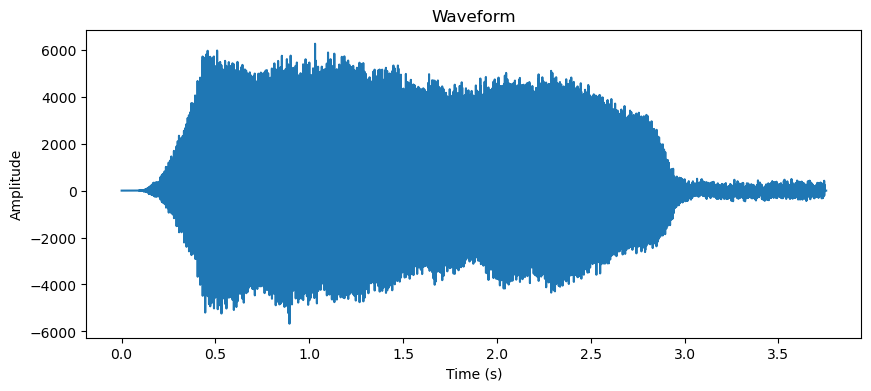

Saved spectrogram plot as Plots/aa//spectrogram.png


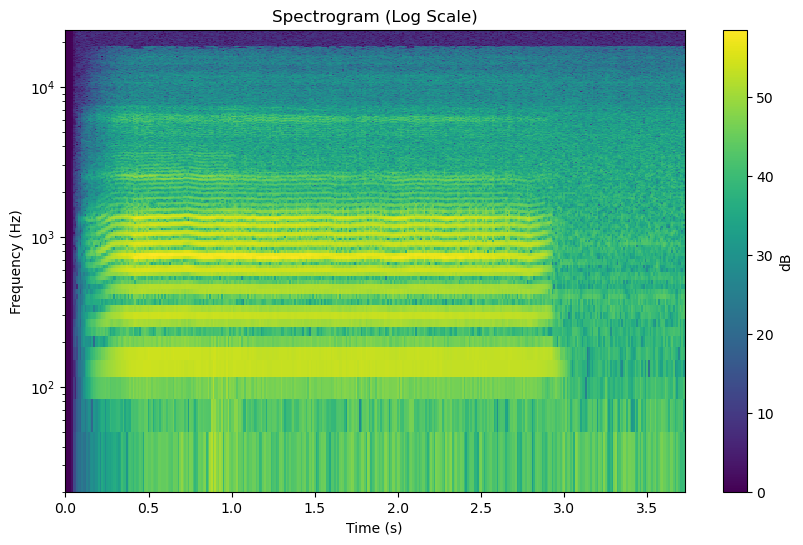

Saved spectrum plot as Plots/aa//spectrum.png


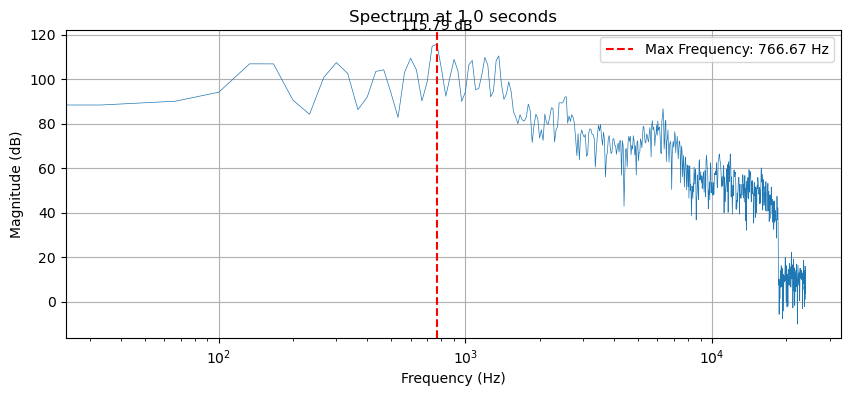

In [15]:
path_to_audio_file = "audios/aa.wav"

# Extract the file name (including extension) from the path
audio_file_name = os.path.basename(path_to_audio_file)

# Print the extracted file name
print("File Name:", audio_file_name)

audio_data, sample_rate = read_audio_file(path_to_audio_file)
window_size_sec = 0.03  # Adjust this value as needed
hop_size_sec = 0.01  # Adjust this value as needed

plot_waveform(audio_data, sample_rate, audio_file_name)

spectrogram = compute_spectrogram(audio_data, sample_rate, window_size_sec, hop_size_sec)
plot_spectrogram(spectrogram, sample_rate, hop_size_sec, audio_file_name)

start_time_sec = 1.0  # Specify the start time for the spectrum
plot_spectrum_at_time(audio_data, sample_rate, start_time_sec, window_size_sec, audio_file_name)

## Mel Spectrogram

In [16]:
import librosa
import librosa.display

In [17]:
window_size = int(window_size_sec * sample_rate)
hop_size = int(hop_size_sec * sample_rate)

In [18]:
n_mels = 128
n_fft=2048

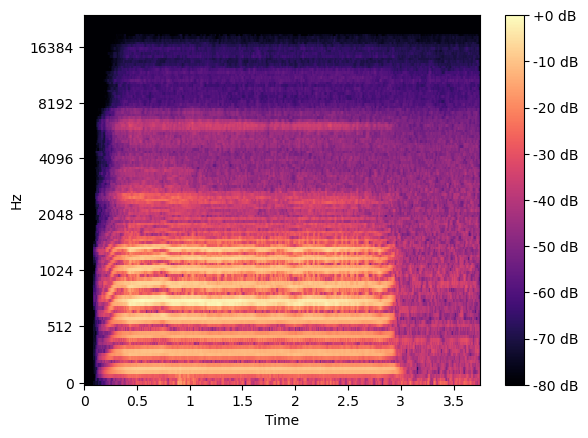

In [19]:
S = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate, n_fft=n_fft, hop_length=hop_size, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sample_rate, hop_length=hop_size, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');